# Firm Centrality Statistics

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
main_dir = "/home/juan.russy/shared/FamilyNetwork/firms_nihs_centrality.tsv"
firm_centrality = pd.read_csv(main_dir, sep='\t', encoding='utf-8')

## Number of Employees Analysis

There exist 206.185 firms with one employee, 65.121 with two, 31.405 with three, etc.

The company with the largest amount of employees has 1414.

In [18]:
n_emp = firm_centrality.num_employees.value_counts().reset_index(drop=False).sort_values(by='index')
n_emp.columns = ['num_employees', 'count']
n_emp

,index,num_employees
0,1,206185
1,2,65121
2,3,31405
3,4,17726
4,5,11108
...,...,...
174,592,1
191,604,1
165,680,1
180,1078,1


<AxesSubplot:>

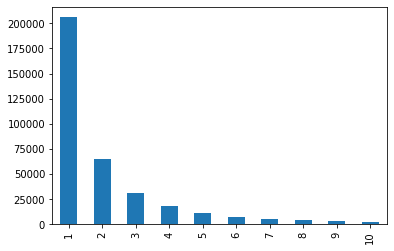

In [8]:
ax = firm_centrality.num_employees.value_counts().head(10).plot(kind='bar')
ax.set_title('Number of firms by number of employees', fontsize=16)
ax.set_xlabel('Number of employees', fontsize=14)
ax.set_ylabel('Number of firms', fontsize=14)
plt.savefig('/home/juan.russy/shared/FamilyNetwork/num_firms_num_emp.png',
            dpi=300, bbox_inches='tight')


Verify how many of the firms with only one employee has the owner as employee

In [38]:
employees_path = "/home/juan.russy/shared/FamilyNetwork/employees_non_incorporated_hs.tsv"
employees_nihs = pd.read_csv(employees_path, sep = '\t', encoding = 'utf-8')

In [39]:
emp = employees_nihs.groupby(
    ['id_firm_hs', 'id_owner_hs']).id_employee_hs.count()
emp = pd.DataFrame(emp).reset_index(drop=False) 
emp = emp [emp.id_employee_hs == 1].id_firm_hs

In [40]:
firms_one_emp = employees_nihs[employees_nihs.id_firm_hs.isin(emp)]
num_identical = (firms_one_emp['id_employee_hs'] == firms_one_emp['id_owner_hs']).sum()

print(
    f"There are {num_identical} rows with identical values in columns 'id_employee_hs' and 'id_owner_hs'. Which represents a {round(num_identical/len(firms_one_emp)*100, 2)}% of the dataset.")


There are 160205 rows with identical values in columns 'id_employee_hs' and 'id_owner_hs'. Which represents a 77.7% of the dataset.


## Fraction of employees that are within 6 degrees of separation

In [ ]:
# Create a grid of plots using facet_wrap
def grid_num_employees(num_employees):
    if num_employees < 10:
        return str(num_employees)
    else:
        return 'more than 10'


firm_centrality['grid_num_employees'] = firm_centrality.num_employees.apply(
    grid_num_employees)
firm_centrality = firm_centrality.sort_values(by='grid_num_employees')

g = sns.FacetGrid(firm_centrality, col="grid_num_employees", col_wrap=5)
g.map(sns.histplot, "fraction_employees", stat='probability')
g.set_titles(
    col_template="# Employees {col_name}", row_template="{row_name}", size=16)
g.set_axis_labels("Fraction of employees", "Probability", size=14)

g.fig.suptitle(
    'Fraction of employees in the consanguinity map by size of the firm', fontsize=25, y=1.1)
# Show the plot
plt.savefig('/home/juan.russy/shared/FamilyNetwork/fraction_employees_by_size.png',
            dpi=300, bbox_inches='tight')


In [ ]:
sns.histplot(data=firm_centrality, x='fraction_employees', stat='probability')
# Set the new tick labels
plt.xticks([x/10 for x in range(11)])
plt.title('Fraction of employees in the consanguinity map', fontsize=16)
plt.xlabel('Fraction of employees', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.savefig('/home/juan.russy/shared/FamilyNetwork/fraction_employees.png',
            dpi=300, bbox_inches='tight')


# Harmonic Centrality

In [46]:
firm_centrality

,id_firm_hs,id_owner_hs,num_employees,harmonic_centrality,avg_dist_employees_owner,fraction_employees,fraction_family,fraction_citizens
0,0000100e43853e27,e293e6137bd5f616,1,0.0,NaN,0.000000,0.000000,1.117340e-07
1,00007133cc53990a,0a2eaeae3e02e116,3,2.0,0.0,0.666667,0.017699,6.312974e-06
2,00009602f43b3b9b,2594cf5214431469,1,1.0,0.0,1.000000,0.016949,3.296154e-06
3,0000c6b2cc710308,14b852a21a631f85,3,1.5,1.0,0.666667,0.020619,5.419101e-06
4,000127ee1f505487,f920312eea1ba9ed,8,3.0,1.6,0.625000,0.040650,6.871644e-06
...,...,...,...,...,...,...,...,...
367801,ffff3d2d70af9b40,da047b778ce12cac,1,1.0,0.0,1.000000,0.004032,1.385502e-05
367802,ffffc8118409f59f,f73f1ef1ab9cb44b,4,4.0,0.5,1.000000,0.012618,1.770985e-05
367803,ffffca1fc98996f9,bdfa902707641488,5,2.0,0.5,0.400000,0.012903,8.659389e-06
367804,ffffd99565ce6bd0,5871394eaf84cc50,2,1.0,0.0,0.500000,0.010989,5.083899e-06


<AxesSubplot:>

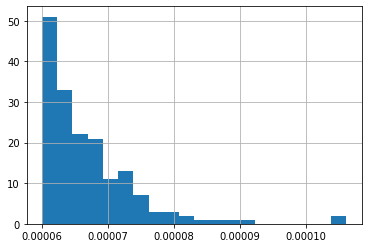

In [45]:
ts = firm_centrality[firm_centrality.fraction_citizens > 0.00006]
ts.fraction_citizens.hist(bins=20)


In [49]:
import pandas as pd

my_list = [1, 2, 3, 4, 5]
my_series = pd.Series(my_list)
print(my_series)
my_series = my_series.append(pd.Series([6, 7, 8, 9, 10]))
print(my_series)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0     1
1     2
2     3
3     4
4     5
0     6
1     7
2     8
3     9
4    10
dtype: int64
